In [1]:
#imports
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from models.cnn import SimpleCNN
from models.mlp import MLP
from distillation_utils import Distiller
from invariances_utils import shift_preserving_shape, test_IM
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

KeyboardInterrupt: 

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision

# Define a simple CNN architecture
class ShiftInvariantCNN(nn.Module):
    def __init__(self):
        super(ShiftInvariantCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Set random seed for reproducibility
torch.manual_seed(42)

# Load the MNIST dataset with data augmentation for training


# Instantiate the model, loss function, and optimizer
model = ShiftInvariantCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

sicnn = model


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision

class LeNet5(torch.nn.Module):
     
    def __init__(self):   
        super(LeNet5, self).__init__()
        # Convolution (In LeNet-5, 32x32 images are given as input. Hence padding of 2 is done below)
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2, bias=True)
        # Max-pooling
        self.max_pool_1 = torch.nn.MaxPool2d(kernel_size=2)
        # Convolution
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0, bias=True)
        # Max-pooling
        self.max_pool_2 = torch.nn.MaxPool2d(kernel_size=2)
        # Fully connected layer
        self.fc1 = torch.nn.Linear(16*5*5, 120)   # convert matrix with 16*5*5 (= 400) features to a matrix of 120 features (columns)
        self.fc2 = torch.nn.Linear(120, 84)       # convert matrix with 120 features to a matrix of 84 features (columns)
        self.fc3 = torch.nn.Linear(84, 10)        # convert matrix with 84 features to a matrix of 10 features (columns)
        
    def forward(self, x):
        # convolve, then perform ReLU non-linearity
        x = torch.nn.functional.relu(self.conv1(x))  
        # max-pooling with 2x2 grid
        x = self.max_pool_1(x)
        # convolve, then perform ReLU non-linearity
        x = torch.nn.functional.relu(self.conv2(x))
        # max-pooling with 2x2 grid
        x = self.max_pool_2(x)
        # first flatten 'max_pool_2_out' to contain 16*5*5 columns
        # read through https://stackoverflow.com/a/42482819/7551231
        x = x.view(-1, 16*5*5)
        # FC-1, then perform ReLU non-linearity
        x = torch.nn.functional.relu(self.fc1(x))
        # FC-2, then perform ReLU non-linearity
        x = torch.nn.functional.relu(self.fc2(x))
        # FC-3
        x = self.fc3(x)
        
        return x
    
# Instantiate the model, loss function, and optimizer
model = LeNet5().to("cuda:0")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs = inputs.to("cuda:0")
        labels = labels.to("cuda:0")
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
sicnn = model
    

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

Not using softmax
Not using softmax
Correct normal: 0.96
Correct shifted: 0.9148
Correct cnn normal: 0.9914
Correct cnn shifted: 0.9871

tensor(0.0156, device='cuda:0')


tensor(0.0967, device='cuda:0')

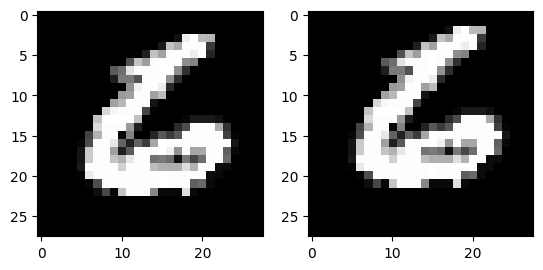

In [1]:
#imports
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from models.cnn import SimpleCNN
from models.mlp import MLP
from distillation_utils import Distiller
from invariances_utils import shift_preserving_shape, test_IM
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
in_channels = 1
num_classes = 10
num_conv_layers = 2
temperature = 1
num_epochs = 10
batch_size = 64
lr = 0.001
TRAIN = False
device = 'cuda'
#np.random.seed(42)
# MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
#loading distilled MLP
mlp_student = MLP(input_dim = 784, output_dim= num_classes, hidden_size= 2048,
          hidden_layers= 4, device='cuda')
cnn = MLP(input_dim = 784, output_dim= num_classes, hidden_size= 2048,
          hidden_layers= 4, device='cuda')
cnn_path = "saved_models/model"
cnn = SimpleCNN(in_channels=in_channels, num_classes=num_classes, num_conv_layers=num_conv_layers, temperature=temperature).to('cuda:0')
distiller = Distiller(student=mlp_student, teacher=cnn, device='cuda', lr=0.001)
state_dict = torch.load(cnn_path)
cnn.load_state_dict(state_dict=state_dict)
cnn = sicnn.to(device)
if TRAIN:
    distiller.distill(train_loader, test_loader)
    torch.save(distiller.get_student().state_dict(), "newdistillmethod/distiller")  
else:
    state_dict = torch.load("newdistillmethod/distiller")
    distiller.get_student().load_state_dict(state_dict=state_dict)
    #distiller.eval_student(train_loader)
test_IM(test_loader, distiller.get_student(), cnn, device)

In [2]:
in_channels = 1
num_classes = 10
num_conv_layers = 2
temperature = 1
num_epochs = 10
batch_size = 64
lr = 0.001
TRAIN = False
device = 'cuda'
#np.random.seed(42)

In [3]:
# MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
#Obtaining CNN
cnn_path = "saved_models/model"
cnn = SimpleCNN(in_channels=in_channels, num_classes=num_classes, num_conv_layers=num_conv_layers, temperature=temperature).to('cuda:0')
if TRAIN:
    criterion_cnn = torch.nn.CrossEntropyLoss()
    optimizer_cnn = torch.optim.Adam(cnn.parameters(), lr=lr)
    # model training
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            outputs = cnn(images.to('cuda'))
            loss = criterion_cnn(outputs, labels.to('cuda'))

            optimizer_cnn.zero_grad()
            loss.backward()
            optimizer_cnn.step()

            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    # Save the trained model
    torch.save(cnn.state_dict(), cnn_path)
    print(f"Model saved as {cnn_path}!")
if not TRAIN:
    state_dict = torch.load(cnn_path)
    cnn.load_state_dict(state_dict=state_dict)

# Testing the model
cnn.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = cnn(images.to('cuda'))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to('cuda')).sum().item()

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9914


In [5]:
#Loading undistilled MLP
if TRAIN:
    mlp = MLP(input_dim = 784, output_dim= num_classes, hidden_size= 2048,
        hidden_layers= 4, device='cuda')
    criterion_mlp = torch.nn.CrossEntropyLoss()
    optimizer_mlp = torch.optim.Adam(mlp.parameters(), lr=lr)
    mlp.train(train_loader=train_loader, optimizer=optimizer_mlp, criterion=criterion_mlp, 
              num_epochs=5)
if not TRAIN:
    mlp = MLP(input_dim = 784, output_dim= num_classes, hidden_size= 2048,
            hidden_layers= 4, device='cuda', from_saved_state_dict="saved_models/mlp")
mlp.eval(test_loader=test_loader)

Not using softmax


TypeError: Module.eval() got an unexpected keyword argument 'test_loader'

In [ ]:
TRAIN = True

In [5]:
#loading distilled MLP
mlp_student = MLP(input_dim = 784, output_dim= num_classes, hidden_size= 2048,
          hidden_layers= 4, device='cuda')
distiller = Distiller(student=mlp_student, teacher=cnn, device='cuda', lr=0.001)
if TRAIN:
    distiller.distill(train_loader, test_loader)
    torch.save(distiller.get_student().state_dict(), "newdistillmethod/distiller")  
else:
    state_dict = torch.load("newdistillmethod/distiller")
    distiller.get_student().load_state_dict(state_dict=state_dict)
    #distiller.eval_student(train_loader)

Not using softmax


In [6]:
test_IM(test_loader, distiller.get_student())

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

---------------
- debug IM
- far andare test_IM con CNN

- compute agreement metrics: how much has the student learnt to predict in the same way as the teacher. 
compute_agreement(student_model, teacher_model) - most of this code already written by Patrick: deepsets/test
- Train 2 independent students with the same teacher, you compare the fidelities, if the 2 students have comparable fidelities they agree with the teacher because they generalize well TODO PING FABIAN
train 2 students as the above cell + compute agreement metrics
- indipendent metrics (ECE, NLL, topk) -> consistent with the literature 
we need to add to the eval process these metrics + have a table of consistence with the literature (what are those metrics for a good mlp/cnn/distilled mlp)
- test distillation with different temperatures: do hyperparameter optimization for this, because I think that having different temperature values does not change stuff (but I could be wrong)
- different MLP model size


- large, heavy, regularized MLP - create a large, heavy, regularized MLP and distill with that
- scale: extended MNIST CIFAR-10 (but cumbersome)
- uncertainties : different seeds 
- 42 101 121 240 308 random seeds 
- non shifted training set + mlp, mlp with distillation on a cnn, run those over test dataset that's shifted -> expect better performance on mlp dist on cnn
- give shifted validation set performance (validation set loss)
- test val set accuracy with alpha different

 
TO DO TOMORROW:
- understand the softmax thing
- plotting with different temperatures

We need to have consistent:
- training
- distillation
- indipendent metrics (ECE, NLL, topk) -> consistent with the literature 
- fidelity metrics
----------------------------
- self distilling mlp
- fix the distillation loss problem
- distill an mlp over an mlp
- train an mlp independently on shifted data - compares with unshifted but distilled 
------------------------------------------


the model actually learns invariances through the teacher -> all of these results hold


ECE,  

Normalization Issues:
Incorrect or inconsistent normalization of input features can cause training instability. Ensure that your input data is properly normalized.

Complexity of the Model:
If your model is too complex for the given task or if it has too many parameters, it may struggle to generalize well, leading to overfitting and erratic loss behavior. Consider simplifying the model architecture or using regularization techniques.

Vanishing or Exploding Gradients:
Problems like vanishing or exploding gradients can hinder the convergence of the model. Apply techniques such as gradient clipping, weight regularization, or normalization layers (e.g., Batch Normalization) to address these issues.

---------------------------------------------------------------------------

Learning Rate Too High:
If the learning rate is set too high, the optimization algorithm might overshoot the minimum, leading to oscillations or divergence. Try reducing the learning rate and observe how it affects the training.

Learning Rate Schedule:
Sometimes, using a learning rate schedule or adaptive learning rate methods (such as learning rate annealing) can help stabilize the training process. These methods adjust the learning rate during training to improve convergence.

Poor Initialization: 
The initial weights of the neural network can have a significant impact on training. Poor weight initialization may lead to difficulties in finding a good solution. Try using appropriate weight initialization techniques.

Batch Size:
The choice of batch size can also affect the stability of training. Smaller batch sizes may introduce more variability in the gradients, leading to fluctuations in the loss.

Data Issues:
Check the quality and consistency of your training data. Noisy or inconsistent data can make it challenging for the model to learn a meaningful representation.

Early Stopping:
If the loss does not improve over a certain number of epochs, it might be worth considering early stopping. Monitor the validation loss and stop training if it starts to increase consistently.

Monitor Metrics Beyond Loss:
Loss is just one metric, and it might not always reflect the performance of the model accurately. Monitor other metrics, such as accuracy or validation performance, to get a more comprehensive view of the model's behavior.

In [5]:
#Self distilling MLP (only from loaded data)

#Self distillation: mlp_student and mlp teacher coincide #TODO CHECK
mlp_student = MLP(input_dim = 784, output_dim= num_classes, hidden_size= 2048,
            hidden_layers= 4, device='cuda', from_saved_state_dict="saved_models/mlp")
mlp_student.eval(test_loader)
print(test_IM(test_loader, mlp_student))

mlp_teacher = MLP(input_dim = 784, output_dim= num_classes, hidden_size= 2048,
            hidden_layers= 4, device='cuda', from_saved_state_dict="saved_models/mlp")
print(test_IM(test_loader, mlp_teacher))

if TRAIN:
    selfdistiller = Distiller(student=mlp_student, teacher=mlp_teacher, device='cuda', lr=0.001)
    selfdistiller.distill(train_loader, 5, "saved_models_selfdistill/")
    selfdistiller.test_step(test_loader=test_loader)

if not TRAIN:
    print("Loading params")
    selfdistiller = Distiller(student=mlp_student, teacher=mlp_teacher, device='cuda', lr=0.001,
                        load_student_from_path = 'saved_models_selfdistill/distiller')
    selfdistiller.test_step(test_loader=test_loader)


Not using softmax
Test Accuracy: 0.9612
tensor(0.8725, device='cuda:0', grad_fn=<DivBackward0>)
Not using softmax
tensor(0.8738, device='cuda:0', grad_fn=<DivBackward0>)
hfafu
Epoch [1/5], Step [100/938], Student Loss : 0.1635, Total Loss: 0.0442
Epoch [1/5], Step [200/938], Student Loss : 0.0570, Total Loss: 0.0225
Epoch [1/5], Step [300/938], Student Loss : 0.3554, Total Loss: 0.1328
Epoch [1/5], Step [400/938], Student Loss : 0.1317, Total Loss: 0.1042
Epoch [1/5], Step [500/938], Student Loss : 0.2529, Total Loss: 0.0886
Epoch [1/5], Step [600/938], Student Loss : 0.0233, Total Loss: 0.0219
Epoch [1/5], Step [700/938], Student Loss : 0.3350, Total Loss: 0.2302
Epoch [1/5], Step [800/938], Student Loss : 0.0820, Total Loss: 0.0284
Epoch [1/5], Step [900/938], Student Loss : 0.4317, Total Loss: 0.0910
Epoch [2/5], Step [100/938], Student Loss : 0.1460, Total Loss: 0.3145
Epoch [2/5], Step [200/938], Student Loss : 0.6121, Total Loss: 0.2191
Epoch [2/5], Step [300/938], Student Loss :

In [6]:
test_IM(test_loader, selfdistiller.get_student())

tensor(0.8889, device='cuda:0', grad_fn=<DivBackward0>)

In [6]:
#Distilling MLP from MLP
mlp_student = MLP(input_dim = 784, output_dim= num_classes, hidden_size= 2048,
            hidden_layers= 4, device='cuda')

mlp_teacher = MLP(input_dim = 784, output_dim= num_classes, hidden_size= 2048,
            hidden_layers= 4, device='cuda', from_saved_state_dict="saved_models/mlp")
print(test_IM(test_loader, mlp_teacher))

if TRAIN:
    mlp_mlp_distiller = Distiller(student=mlp_student, teacher=mlp_teacher, device='cuda', lr=0.001)
    mlp_mlp_distiller.distill(train_loader, 5, "saved_models_mlpfrommlp/")
    mlp_mlp_distiller.test_step(test_loader=test_loader)

if not TRAIN:
    print("Loading params")
    mlp_mlp_distiller = Distiller(student=mlp_student, teacher=mlp_teacher, device='cuda', lr=0.001,
                        load_student_from_path = 'saved_models_mlpfrommlp/distiller')
    mlp_mlp_distiller.test_step(test_loader=test_loader)

Not using softmax
Not using softmax
tensor(0.8729, device='cuda:0', grad_fn=<DivBackward0>)
hfafu
Epoch [1/5], Step [100/938], Student Loss : 27.8136, Total Loss: 8.6661
Epoch [1/5], Step [200/938], Student Loss : 188.4176, Total Loss: 11.5220
Epoch [1/5], Step [300/938], Student Loss : 662.5803, Total Loss: 13.8150
Epoch [1/5], Step [400/938], Student Loss : 752.3962, Total Loss: 14.6692
Epoch [1/5], Step [500/938], Student Loss : 609.8974, Total Loss: 14.1995
Epoch [1/5], Step [600/938], Student Loss : 2639.6240, Total Loss: 15.4462
Epoch [1/5], Step [700/938], Student Loss : 2322.1643, Total Loss: 14.6260
Epoch [1/5], Step [800/938], Student Loss : 2393.5117, Total Loss: 14.2670
Epoch [1/5], Step [900/938], Student Loss : 2528.3132, Total Loss: 17.2357
Epoch [2/5], Step [100/938], Student Loss : 2206.9958, Total Loss: 14.5140


KeyboardInterrupt: 

In [14]:
test_IM(test_loader, mlp_mlp_distiller.get_student())

tensor(0.1270, device='cuda:0', grad_fn=<DivBackward0>)

In [18]:
# Define a custom dataset that combines MNIST and additional data
class ShiftAugmentedMNIST(Dataset):
    def __init__(self, mnist_dataset, translation_times : int = 5, max_shift : int = 7):
        self.mnist_dataset = mnist_dataset
        directions = ["u","d","l","r"]
        self.translations = []
        for i in range(len(self.mnist_dataset)):
            img, label = self.mnist_dataset[i]
            img = img.squeeze()
            for t in range(translation_times):
                sh = shift_preserving_shape(img, direction=directions[np.random.randint(0,4)],
                                            max_shift=max_shift).unsqueeze(0)
                if sh is not None:
                    self.translations.append((sh, label))

    def __getitem__(self, index):
        if index < len(self.mnist_dataset):
            return self.mnist_dataset[index]
        else:
            return self.translations[index - len(self.mnist_dataset)]

    def __len__(self):
        return len(self.mnist_dataset) + len(self.translations)

In [25]:
# MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_augmented_dataset = ShiftAugmentedMNIST(train_dataset)
train_augmented_loader = DataLoader(dataset=train_augmented_dataset, batch_size=batch_size, shuffle=True)

In [26]:
#Evaluating MLP trained on invariance data
if TRAIN:
    shift_invariant_mlp = MLP(input_dim = 784, output_dim= num_classes, hidden_size= 2048,
        hidden_layers= 4, device='cuda')
    criterion_mlp = torch.nn.CrossEntropyLoss()
    optimizer_mlp = torch.optim.Adam(shift_invariant_mlp.parameters(), lr=lr)
    shift_invariant_mlp.train(train_loader=train_augmented_loader, optimizer=optimizer_mlp, criterion=criterion_mlp, 
              num_epochs=5, save_path_folder = "saved_models_shiftinvariantmlp")
if not TRAIN:
    shift_invariant_mlp = MLP(input_dim = 784, output_dim= num_classes, hidden_size= 2048,
            hidden_layers= 4, device='cuda', from_saved_state_dict="saved_models_shiftinvariantmlp/mlp")
shift_invariant_mlp.eval(test_loader=test_loader)

Not using softmax
Epoch [1/5], Step [100/5625], Loss: 1.4332
Epoch [1/5], Step [200/5625], Loss: 1.2715
Epoch [1/5], Step [300/5625], Loss: 0.9806
Epoch [1/5], Step [400/5625], Loss: 0.6599
Epoch [1/5], Step [500/5625], Loss: 0.4850
Epoch [1/5], Step [600/5625], Loss: 0.6876
Epoch [1/5], Step [700/5625], Loss: 0.3734
Epoch [1/5], Step [800/5625], Loss: 0.4117
Epoch [1/5], Step [900/5625], Loss: 0.5502
Epoch [1/5], Step [1000/5625], Loss: 0.3068
Epoch [1/5], Step [1100/5625], Loss: 0.3532
Epoch [1/5], Step [1200/5625], Loss: 0.3167
Epoch [1/5], Step [1300/5625], Loss: 0.2602
Epoch [1/5], Step [1400/5625], Loss: 0.1548
Epoch [1/5], Step [1500/5625], Loss: 0.3497
Epoch [1/5], Step [1600/5625], Loss: 0.3821
Epoch [1/5], Step [1700/5625], Loss: 0.3323
Epoch [1/5], Step [1800/5625], Loss: 0.1482
Epoch [1/5], Step [1900/5625], Loss: 0.4713
Epoch [1/5], Step [2000/5625], Loss: 0.2970
Epoch [1/5], Step [2100/5625], Loss: 0.5642
Epoch [1/5], Step [2200/5625], Loss: 0.2986
Epoch [1/5], Step [2300

In [27]:
test_IM(test_loader, shift_invariant_mlp)

tensor(0.0822, device='cuda:0', grad_fn=<DivBackward0>)

In [9]:
#Train student model on this 
mlp_student = MLP(input_dim = 784, output_dim= num_classes, hidden_size= 2048,
            hidden_layers= 4, device='cuda')

mlp_teacher = MLP(input_dim = 784, output_dim= num_classes, hidden_size= 2048,
            hidden_layers= 4, device='cuda', from_saved_state_dict="saved_models_shiftinvariantmlp/mlp")
print("Invariance of teacher:" + str(test_IM(test_loader, mlp_teacher)))

if TRAIN:
    shiftinvmlp_mlp_distiller = Distiller(student=mlp_student, teacher=mlp_teacher, device='cuda', lr=0.001)
    shiftinvmlp_mlp_distiller.distill(train_loader, 5, "saved_models_mlpfromshiftinvariantmlp/")
    shiftinvmlp_mlp_distiller.test_step(test_loader=test_loader)

if not TRAIN:
    print("Loading params")
    shiftinvmlp_mlp_distiller = Distiller(student=mlp_student, teacher=mlp_teacher, device='cuda', lr=0.001,
                        load_student_from_path = 'saved_models_mlpfromshiftinvariantmlp/distiller')
    shiftinvmlp_mlp_distiller.test_step(test_loader=test_loader)

Not using softmax
Not using softmax
Invariance of teacher:tensor(0.0821, device='cuda:0', grad_fn=<DivBackward0>)
Epoch [1/5], Step [100/938], Student Loss : 3.4604, Total Loss: 15.6608
Epoch [1/5], Step [200/938], Student Loss : 2.1550, Total Loss: 3.0418
Epoch [1/5], Step [300/938], Student Loss : 0.2299, Total Loss: 1.6676
Epoch [1/5], Step [400/938], Student Loss : 0.9416, Total Loss: 2.1623
Epoch [1/5], Step [500/938], Student Loss : 1.0407, Total Loss: 3.0659
Epoch [1/5], Step [600/938], Student Loss : 0.8709, Total Loss: 2.0034
Epoch [1/5], Step [700/938], Student Loss : 0.2186, Total Loss: 1.1539
Epoch [1/5], Step [800/938], Student Loss : 0.1631, Total Loss: 1.0458
Epoch [1/5], Step [900/938], Student Loss : 0.4773, Total Loss: 1.4397
Epoch [2/5], Step [100/938], Student Loss : 0.3148, Total Loss: 1.6611
Epoch [2/5], Step [200/938], Student Loss : 0.3473, Total Loss: 3.0052
Epoch [2/5], Step [300/938], Student Loss : 0.5968, Total Loss: 1.6403
Epoch [2/5], Step [400/938], Stud

In [10]:
test_IM(test_loader, shiftinvmlp_mlp_distiller.get_student())

tensor(0.9111, device='cuda:0', grad_fn=<DivBackward0>)

In [45]:
test_IM(test_loader, shiftinvmlp_mlp_distiller.get_student())

tensor(0.1400, device='cuda:0', grad_fn=<DivBackward0>)

vanilla MLP -> 0.9
CNN over MLP -> 0.6

Self-distilled MLP -> 0.5
MLP over MLP -> 0.5

distilled MLP over data augmented MLP on non augmented dataset -> 0.48

extended MNIST and split the dataset in 2 -> train 2 independent CNNs (or use low teacher fidelity, KL between teachers should be high) get t and t', distill to s and s', compute agreement between t and s' 

repeat process for all temperatures [1,4,8,16] and all random seeds 

Data augmented MLP -> 0.09
(distilled MLP over data augmented MLP on augmented dataset -> 0.1)

change IM measure with temperature

a = [0.34, 0.77, 100]
b = [0.77, 0.34, 100]

return torch.sum(torch.norm(labels_normal - labels_shifted, dim=1))

(a - b )^2